In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import os

In [2]:
## Set up. 
dataDir = '/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_03_01_multiwayInteractions/2023_03_01_v0_dataGathering/v0_hypergraphSimulations/getMultiwayInteractions_fromBPChains/v2.checkSubsetValidity/'

cNames = ["empStat","cosStat","sample","card","GT","Perc","Iter"]
summ1 = pd.read_csv(f'{dataDir}summaryFile_sample1.tab',delimiter="\t",
                    names = cNames)
summ2 = pd.read_csv(f'{dataDir}summaryFile_sample2.tab',delimiter="\t",
                    names = cNames)

In [3]:
columns_to_join = ['sample','card','Iter']
summ1['SampleID'] = summ1[columns_to_join].apply(lambda row:'_'.join(map(str, row)), axis=1)
summ2['SampleID'] = summ2[columns_to_join].apply(lambda row:'_'.join(map(str, row)), axis=1)

summ1['Perc'] = pd.to_numeric(summ1['Perc'].str.replace('perc', ''))
summ1['card'] = pd.to_numeric(summ1['card'].str.replace('Card', ''))
summ2['Perc'] = pd.to_numeric(summ2['Perc'].str.replace('perc', ''))
summ2['card'] = pd.to_numeric(summ2['card'].str.replace('Card', ''))

summ1['emp_cos'] = summ1['empStat'] * summ1['cosStat']
summ2['emp_cos'] = summ2['empStat'] * summ2['cosStat']


In [4]:
summ1.head()

,empStat,cosStat,sample,card,GT,Perc,Iter,SampleID,emp_cos
0,1,1,Sample1,3,Int,10,1,Sample1_Card3_1,1
1,1,1,Sample1,3,Int,10,2,Sample1_Card3_2,1
2,0,1,Sample1,4,Int,10,1,Sample1_Card4_1,0
3,1,1,Sample1,4,Int,10,2,Sample1_Card4_2,1
4,0,0,Sample1,3,Exp,10,1,Sample1_Card3_1,0


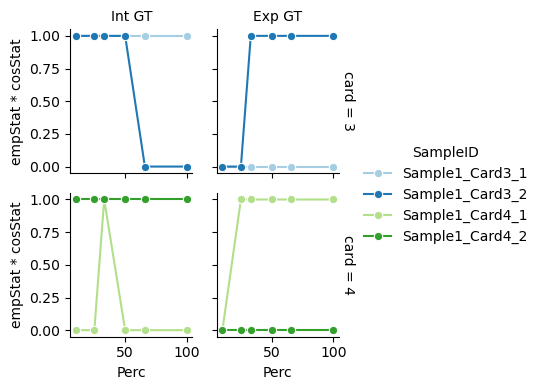

In [62]:
summ1['SampleID'] = pd.Categorical(summ1['SampleID'])

legend_order = ["Sample1_Card3_1","Sample1_Card3_2", "Sample1_Card4_1","Sample1_Card4_2"]
sns.set_palette("Paired")

# Set up the facet grid with Seaborn
g = sns.FacetGrid(summ1, col='GT', row='card', margin_titles=True, 
                  height=2, hue = "SampleID", hue_order=legend_order)

# Plot the data on the facet grid
g.map(sns.lineplot, 'Perc', 'emp_cos',marker='o')

# Add titles and adjust layout
g.set_axis_labels('Perc', 'empStat * cosStat')
g.set_titles(col_template="{col_name} GT")
g.add_legend()

# Show the plot
plt.show()

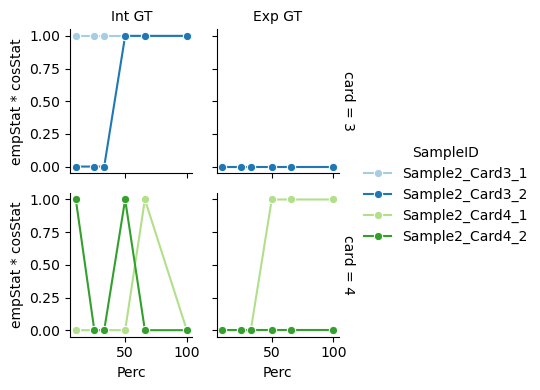

In [64]:
summ2['SampleID'] = pd.Categorical(summ2['SampleID'])

# Set up the facet grid with Seaborn
g = sns.FacetGrid(summ2, col='GT', row='card', margin_titles=True, 
                  height=2, hue = "SampleID")

# Plot the data on the facet grid
g.map(sns.lineplot, 'Perc', 'emp_cos',marker='o')

# Add titles and adjust layout
g.set_axis_labels('Perc', 'empStat * cosStat')
g.set_titles(col_template="{col_name} GT")
g.add_legend()

# Show the plot
plt.show()

In [4]:
def finalBounded_fromEdge(edge,maxPossLen):
    split_edge = edge.split("_")
    nonZeroBins = [(int(e.split(":")[1])+1)//5 for e in  split_edge]

    rCard = len(split_edge)
    ixFirst = nonZeroBins[0]
    ixLast = nonZeroBins[-1]

    concatemerLen = ixLast - ixFirst + 1
    consecBinCounts = [i - j for i,j in 
                    zip(nonZeroBins[:0:-1],nonZeroBins[-2::-1])].count(1)
    skipLen = (rCard - 1 - consecBinCounts)
    score = (skipLen + 1) * concatemerLen / (rCard * maxPossLen)
    return(score)

In [5]:
readIDs = ["Bin245:249_Bin260:264_Bin430:434","Bin245:249_Bin255:259_Bin290:294",
           "Bin60:64_Bin65:69_Bin70:74_Bin130:134","Bin0:4_Bin5:9_Bin40:44_Bin85:89",
           "Bin0:4_Bin10:14_Bin140:144","Bin0:4_Bin5:9_Bin30:34",
           "Bin50:54_Bin55:59_Bin65:69_Bin105:109","Bin5:9_Bin30:34_Bin35:39_Bin40:44",
           "Bin0:4_Bin10:14_Bin30:34","Bin0:4_Bin25:29_Bin390:394",
           "Bin5:9_Bin25:29_Bin95:99_Bin100:104","Bin10:14_Bin20:24_Bin25:29_Bin35:39",
           "Bin55:59_Bin65:69_Bin75:79","Bin5:9_Bin45:49_Bin150:154",
           "Bin60:64_Bin65:69_Bin80:84_Bin85:89","Bin190:194_Bin195:199_Bin200:204_Bin215:219"]

[finalBounded_fromEdge(edge,100) for edge in readIDs]

[0.38,
 0.1,
 0.075,
 0.135,
 0.29,
 0.04666666666666667,
 0.09,
 0.04,
 0.07,
 0.79,
 0.15,
 0.045,
 0.05,
 0.3,
 0.03,
 0.03]

/scratch/ipykernel_3682/546265864.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summ1_subset['SampleID'] = pd.Categorical(summ1_subset['SampleID'])


<Figure size 800x800 with 0 Axes>

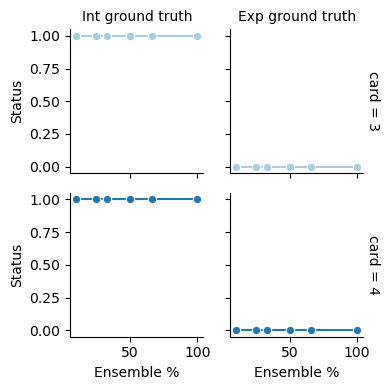

<Figure size 640x480 with 0 Axes>

In [7]:
## For slides:
summ1_subset = summ1[summ1['SampleID'].isin(['Sample1_Card3_1','Sample1_Card4_2'])]

summ1_subset['SampleID'] = pd.Categorical(summ1_subset['SampleID'])

# columns_to_join = ['sample','card','Iter','GT']
# summ1['SampleID'] = summ1[columns_to_join].apply(lambda row:'_'.join(map(str, row)), axis=1)

# summ1['Perc'] = pd.to_numeric(summ1['Perc'].str.replace('perc', ''))
# summ1['card'] = pd.to_numeric(summ1['card'].str.replace('Card', ''))

# summ1['emp_cos'] = summ1['empStat'] * summ1['cosStat']

# summ1.head()

plt.figure(figsize=(8,8))
legend_order = ["Sample1_Card3_1","Sample1_Card4_2"]
sns.set_palette("Paired")

# Set up the facet grid with Seaborn
g = sns.FacetGrid(summ1_subset, col='GT', row='card', margin_titles=True, 
                  height=2, hue = "SampleID", hue_order=legend_order)

# Plot the data on the facet grid
g.map(sns.lineplot, 'Perc', 'emp_cos',marker='o')

# Add titles and adjust layout
g.set_axis_labels('Ensemble %', 'Status')
g.set_titles(col_template="{col_name} ground truth")
#g.add_legend()

# Show the plot
plt.show()
plt.savefig(f'{dataDir}/Plots/ensembleInterestingnessAccuracy.pdf',bbox_inches = 'tight',facecolor = "white")